In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
#% matplotlib inline

In [2]:
cap = cv2.VideoCapture('./AundhBridge.mp4')

In [3]:
#Define a function for showing the images in a single frame
def show_images(images, captions = None, cmap='gray'):
    f, axes = plt.subplots(1, len(images), sharey = True)
    f.set_figwidth(15)
    for ax, images, captions in zip(axes, images,captions):
        ax.imshow(images,cmap)
        ax.set_title(captions)

In [4]:
# Capture the frmae from video
cap = cv2.VideoCapture('./AundhBridge.mp4')

In [5]:
# Read the consecutive Frames from the cap video object
ret, fFrame = cap.read()
ret, fFrame1 = cap.read()
ret, fFrame2 = cap.read()

In [6]:
img1 = fFrame1.copy()
img2 = fFrame2.copy()

SHOW_DEBUG_STEPS = True

# showing the image properties
if (SHOW_DEBUG_STEPS):
    print('image1_Height:'+ str(img1.shape[0])+' ' +'image1_Width:'+ str(img1.shape[1]))
    print('image2_Height:'+ str(img2.shape[0])+' ' +'image2_Width:'+ str(img2.shape[1]))

image1_Height:720 image1_Width:1280
image2_Height:720 image2_Width:1280


In [7]:
# Convert the images to gray scale for further preprocessing
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

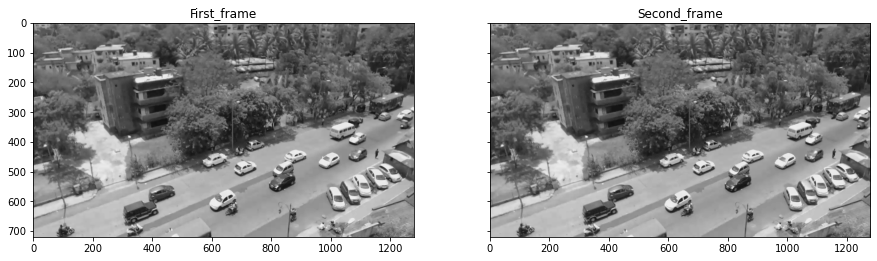

In [8]:
# Showing the Converting two images
show_images([img1, img2], captions = ['First_frame', 'Second_frame'], cmap='gray')

In [9]:
#Adding the Gaussion blur for smoothing the two converted images
img1 = cv2.GaussianBlur(img1, (5,5),0)
img2 = cv2.GaussianBlur(img2, (5,5),0)

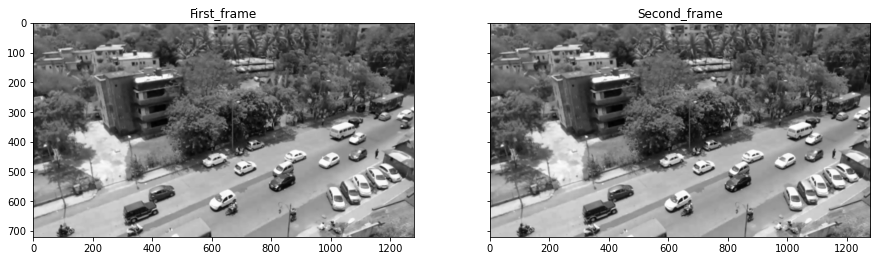

In [10]:
show_images([img1, img2], captions = ['First_frame', 'Second_frame'], cmap='gray')

##### Find any movement in the video. If there is any change in the video, the frames pixel value will change. Therefore, we take two consecutive frames and subtract the pixels or images to another images.
Then we apply the Threshold. And apply a condition if any pixel value less 30 it will set as zero and others are 255.
It says that mainly stationay pixels are removed from the image, because they have no chnage in the pixel value


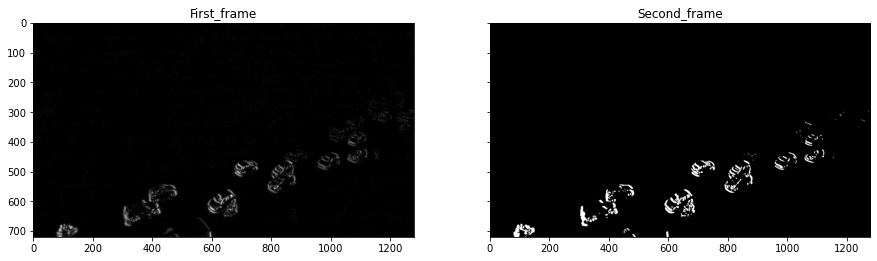

In [11]:
img_diff = cv2.absdiff(img1, img2)
ret,img_Threshold = cv2.threshold(img_diff, 30.0,255.0, cv2.THRESH_BINARY)
img_Thresh = img_Threshold.copy()
show_images([img_diff, img_Thresh], captions = ['First_frame', 'Second_frame'], cmap='gray')

In the Binary image we observe the movement of the vehicle. It appears in the image because they are moving.
Now, The object looks like broken, here we use the dilation and erosion to fill the gaps. 


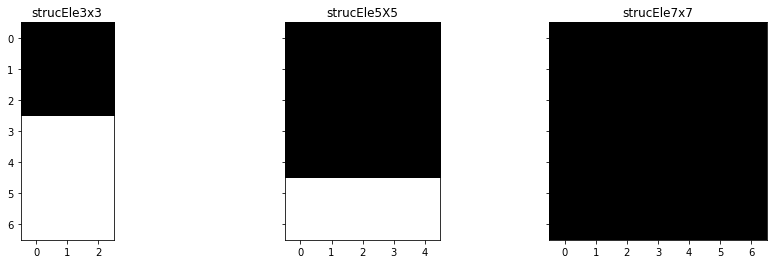

In [12]:
#define the structering element
strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
strucEle5X5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
show_images([strucEle3x3, strucEle5X5, strucEle7x7], captions = ['strucEle3x3', 'strucEle5X5', 'strucEle7x7'], cmap='gray')

img_threshcopy Height720 img_threshcopy Width1280
img_threshcopy Height720 img_threshcopy Width1280


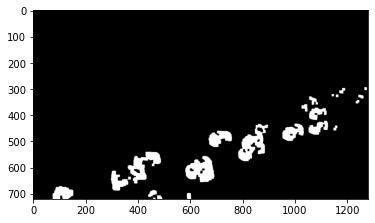

In [14]:
#Apply the Dilation and Erosion (Morphological Transformation) on the Threshold Image, as the vehicles in the image looks like 
#Broken. To remove the balck region on the vehicle object use the Dilation then the erosion.
#img_thresh1 = img_Thresh.copy()

for i in range(2):
    img_Thresh = cv2.dilate(img_Thresh,strucEle5X5,iterations = 2)
    img_Thresh = cv2.erode(img_Thresh,strucEle5X5,iterations = 1)
    img_threshcopy = img_Thresh.copy()
    print('img_threshcopy Height'+str(img_threshcopy.shape[0])+' '+'img_threshcopy Width'+str(img_threshcopy.shape[1]))
plt.imshow(img_threshcopy, cmap = 'gray')

In [15]:
# define the color
SCALER_WHITE = (255.0,255.0, 255.0) 
SCALER_BALCK = (0.0, 0.0, 0.0) 

In [16]:
#Defione the contoure function for showing the Contours
def drawAndSchowContrours(ht,wd, contours,Image_Name):
    global SCALER_WHITE
    global SCALER_BALCK 
    
    blank_image = np.zeros((ht,wd,3), np.uint8)
    cv2.drawContours(blank_image, contours, -1, SCALER_WHITE, -1)
    blank_image_9 = np.zeros((ht,wd,3), np.uint8)
    cv2.drawContours(blank_image_9, contours, 8, SCALER_WHITE, -1)
    # Plotting both the image
    show_images([blank_image, blank_image_9], captions = ['All_Contours', 'Contours_9'], cmap='gray')
    return blank_image

720 1280 720 1280


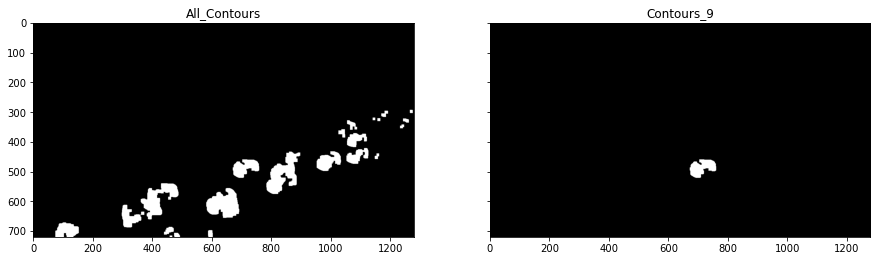

In [17]:
ht = img_threshcopy.shape[0]
wd = img_threshcopy.shape[1]

ht1 = np.size(img_threshcopy,0)
wd1 = np.size(img_threshcopy,1)

print(ht,wd,ht1,wd1)

contours, hierearchy = cv2.findContours(img_threshcopy, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img1 = drawAndSchowContrours(ht,wd, contours,'imgContours')

In [225]:
#Find the number of Contours
print('Number of contours in the Binary Image:', len(contours))

Number of contours in the Binary Image: 22


We want the object looks like a closed area, not like broken. Here, if we use more morphological transformation then the distance between two vehcile will reduce. 
To fill the gap in the object of the resulted image, we use the Hull concept. 

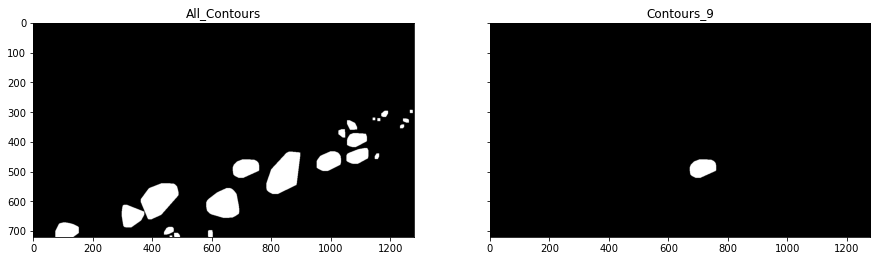

In [228]:
hulls = contours
for i in range(len(contours)):
    hulls[i] = cv2.convexHull(contours[i])
# Show the image with Hull effect
img2 = drawAndSchowContrours(ht,wd, hulls,'imgContours_Hull')